In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [154]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [155]:
df.shape

(891, 12)

In [156]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [157]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [159]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

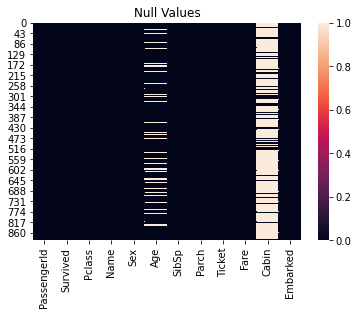

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

As we can see there are certain null values in 'Age' and 'cabin' column.

In [162]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))
df['Embarked']=df['Embarked'].fillna(' ')

In [163]:
df= df.drop(['Cabin'],axis=1)

In [164]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Removed null values from "Age" & "Embarked" column, as of 'cabin' out of 891 rows 687 were NaN values so droped it.

# Data Visualisation 

891


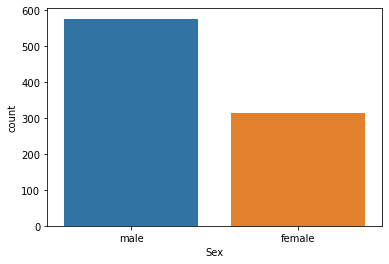

In [165]:
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].count())

We can clearly understand from above visualisation that, there were more female passengers than male.

891


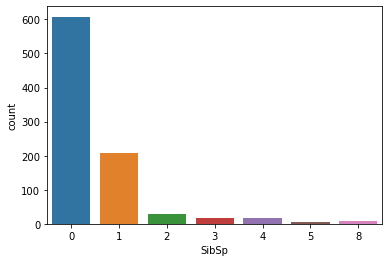

In [166]:
ax=sns.countplot(x='SibSp',data=df)
print(df['SibSp'].count())

Here, we can see the no of siblings, for passengers. Around 600 passengers had 0 siblings & least passengers had 5 siblings.

891


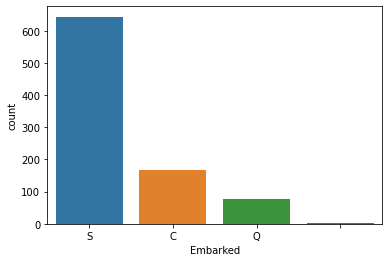

In [167]:
ax=sns.countplot(x='Embarked',data=df)
print(df['Embarked'].count())

891


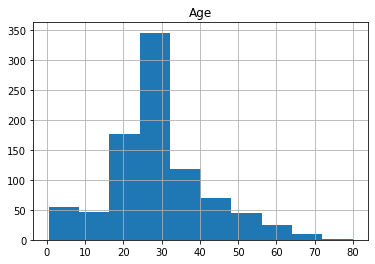

In [168]:
df['Age'].hist(grid=True)
plt.title('Age')
print(df['Age'].count())
plt.show()

891


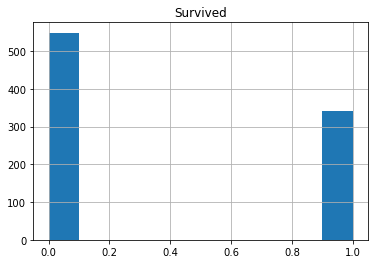

In [169]:
df['Survived'].hist(grid=True)
plt.title('Survived')
print(df['Survived'].count())
plt.show()

As we can see more than 500 passengers could not survive the event.

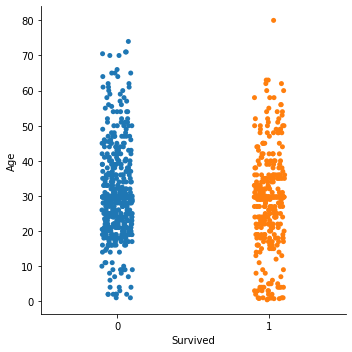

In [170]:
sns.catplot(x='Survived',y='Age',data=df)

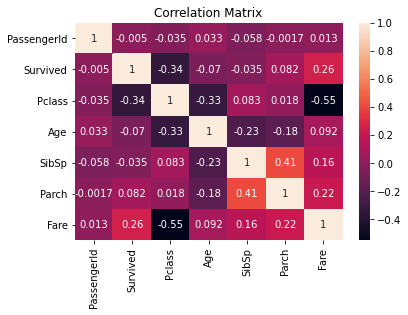

In [171]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [172]:
corr_matrix=df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64

# Encoding the data

In [173]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [176]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,3.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,1.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,3.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,3.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,3.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,3.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,3.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,3.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,1.0


In [177]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.270634
dtype: float64

Keeping +/-(0.5) as the range of skewness. There's no treatment required.

# Checking for Outliers 

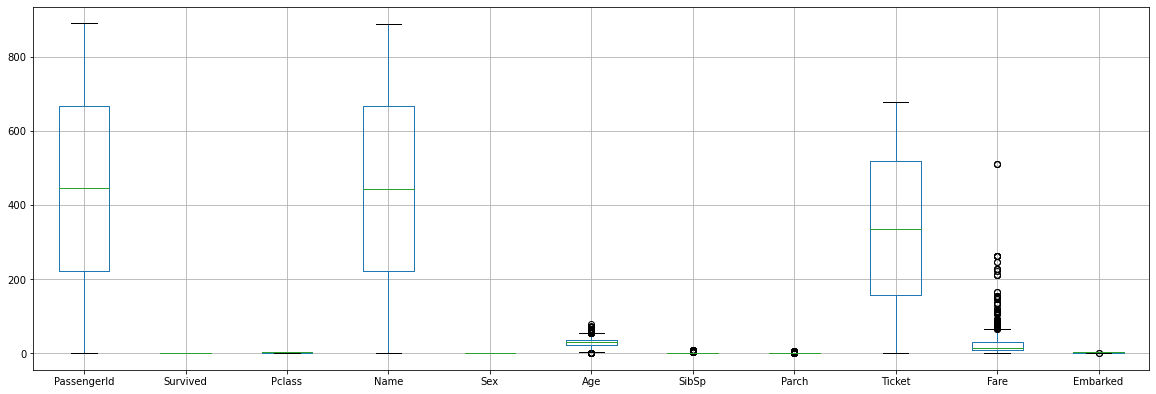

In [178]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

We can see some outliers in 'Age' & 'Fare' columns, considering them extreame values and not outliers, we can move ahead. 

In [182]:
x=df.drop('Survived', axis =1)
y=df['Survived']

# Finding best random_state

In [183]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR=LogisticRegression 
    LR.fit(x_train, y_train)
    predrf=dtc.predict(x_test) 
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is ", maxAccu," on Random_state ", maxRS)

TypeError: fit() missing 1 required positional argument: 'y'

# Creating train test split

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=130)

In [187]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8097014925373134
[[147  15]
 [ 36  70]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       162
           1       0.82      0.66      0.73       106

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



In [188]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7649253731343284
[[124  38]
 [ 25  81]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       162
           1       0.68      0.76      0.72       106

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.76      0.77       268



In [189]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8246268656716418
[[149  13]
 [ 34  72]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       162
           1       0.85      0.68      0.75       106

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [190]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.6753731343283582
[[153   9]
 [ 78  28]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       162
           1       0.76      0.26      0.39       106

    accuracy                           0.68       268
   macro avg       0.71      0.60      0.59       268
weighted avg       0.70      0.68      0.63       268



# Cross Validation

In [191]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : 0.7778293892411023


In [192]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc, x, y, cv=5)
print('Cross validation score of DecissionTreeClassifier model :',scr.mean())

Cross validation score of DecissionTreeClassifier model : 0.7308266901010608


In [193]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.831680371602536


In [194]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc, x, y, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.6577364886071182


Minimum difference in accuracy and cross validation is for RandomForestClassifier model.
Hence RandomForestClassifier is our best model.

# Hyper Parameter Tuning

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
parameters= {'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [197]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [198]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [199]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [200]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [201]:
accuracy_score(y_test,GCV_pred)

0.835820895522388

In [202]:
import joblib
joblib.dump(GCV.best_estimator_,'Titanic_Project.pkl')

['Titanic_Project.pkl']